# MNIST - Categorical Classification

## Overfitting Issue
- import tensorflow

In [5]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.__version__

'2.6.0'

- GPU 설정확인

In [6]:
tf.test.gpu_device_name()

'/device:GPU:0'

# 1. MNIST Data_set Load& Review

## 1) Load MNIST Data_Set

In [7]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


- train_data information

In [8]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


- test_data information

In [9]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


## 2) Visualization

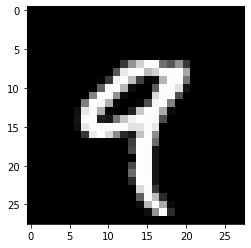

In [10]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap='gray')
plt.show()

In [11]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# 2. Data preprocessing

## 1) Reshape and Normalization

- reshape
    - (60000,28,28) to (60000,784)

In [12]:
X_train = X_train.reshape((60000,28*28))
X_test = X_test.reshape((10000,28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

- Normalization

In [13]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

## 2) One Hot Encoding

In [14]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# 3. MNIST Keras Modeling

## 1) Model Define

- 모델 신경망 구조 정의
    - 2개의 Hidden Layers & 768개의 Nodes
    - 복잡한 Model Capacity로 인한 Overfitting

In [15]:
#from tensorflow.keras import models
#from tensorflow.keras import layers

#mnist = models.Sequential()
#mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
#mnist.add(layers.Dense(256, activation = 'relu'))                 
#mnist.add(layers.Dense(10, activation = 'softmax'))

- Overfitting 줄이기
    - Model Capacity 줄이기

In [16]:
#from tensorflow.keras import models
#from tensorflow.keras import layers

#mnist = models.Sequential()
#mnist.add(layers.Dense(256, activation = 'relu', input_shape=(28*28,)))
## mnist.add(layers.Dense(256, activation = 'relu'))                         # model의 capacity를 감소시켜 overfitting 줄이기
#mnist.add(layers.Dense(10, activation = 'softmax'))

- Overfitting 줄이기2
    - L2 Regularization

In [17]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
#from tensorflow.keras import regularizers

#mnist = models.Sequential()
#mnist.add(layers.Dense(512, activation = 'relu',
#                       kernel_regularizer = regularizers.l2(0.00001),input_shape=(28*28,)))
#mnist.add(layers.Dense(256, activation = 'relu',
#                       kernel_regularizer = regularizers.l2(0.00001)))
#mnist.add(layers.Dense(10, activation = 'softmax'))

- Overfitting 줄이기3
    - Dropout

In [18]:
# from tensorflow.keras import models
# from tensorflow.keras import layers

# mnist = models.Sequential()
# mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
# mnist.add(layers.Dropout(0.4))
# mnist.add(layers.Dense(256, activation = 'relu'))                 
# mnist.add(layers.Dropout(0.2))
# mnist.add(layers.Dense(10, activation = 'softmax'))

- Overfitting 줄이기4
    - Batch Normalization

In [19]:
# from tensorflow.keras import models
# from tensorflow.keras import layers

# mnist = models.Sequential()
# mnist.add(layers.Dense(512,input_shape=(28*28,)))
# mnist.add(layers.BatchNormalization())
# mnist.add(layers.Activation('relu'))
# mnist.add(layers.Dense(256))                 
# mnist.add(layers.BatchNormalization())
# mnist.add(layers.Activation('relu'))
# mnist.add(layers.Dense(10, activation = 'softmax'))

- Overfitting 줄이기5
    - L2 Regularization + Dropout

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001), input_shape=(28*28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.00001)))                 
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

- 모델 구조 확인

In [32]:
mnist.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## 2) Model Compile
- 모델 학습방법 설정

In [33]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

## 3) Model Fit

- 약 3분

In [34]:
%%time

Hist_mnis = mnist.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.3265 - accuracy: 0.9025 - val_loss: 0.1543 - val_accuracy: 0.9558
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1526 - accuracy: 0.9563 - val_loss: 0.1081 - val_accuracy: 0.9702
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1191 - accuracy: 0.9673 - val_loss: 0.1086 - val_accuracy: 0.9731
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1040 - accuracy: 0.9719 - val_loss: 0.0908 - val_accuracy: 0.9771
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0936 - accuracy: 0.9747 - val_loss: 0.0983 - val_accuracy: 0.9768
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0878 - accuracy: 0.9772 - val_loss: 0.0915 - val_accuracy: 0.9798
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0798 - accuracy: 0.9791 - val_loss: 0.0934 - val_accuracy: 0.9799

## 4) 학습 결과 시각화  - Overfitting

- Loss Visualization

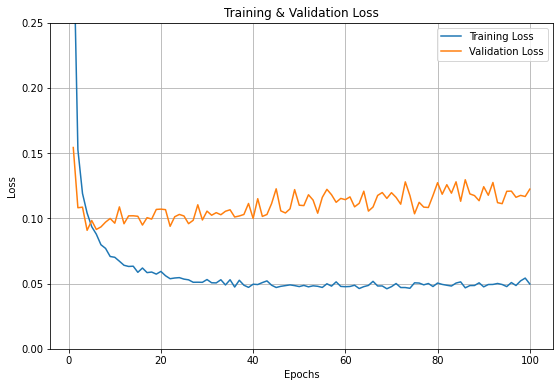

In [35]:
epochs = range(1, len(Hist_mnis.history['loss']) +1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnis.history['loss'])
plt.plot(epochs, Hist_mnis.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

## 5) Model Evaluate

- Loss & Accuracy

In [36]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1178 - accuracy: 0.9830
Loss = 0.11775
Accuracy = 0.98300


## 6) Model Predict

- Probability

In [29]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1, :]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


- Class

In [26]:
print(np.argmax(mnist.predict(X_test[:1,:])))

7


- Overfitting줄이기 6
    - L2 + Batch

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.00001),input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256,kernel_regularizer = regularizers.l2(0.00001)))                 
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [38]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [39]:
%%time

Hist_mnis = mnist.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.1901 - accuracy: 0.9462 - val_loss: 0.1066 - val_accuracy: 0.9700
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0824 - accuracy: 0.9780 - val_loss: 0.1042 - val_accuracy: 0.9710
Epoch 3/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0568 - accuracy: 0.9853 - val_loss: 0.0956 - val_accuracy: 0.9758
Epoch 4/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0439 - accuracy: 0.9890 - val_loss: 0.1056 - val_accuracy: 0.9747
Epoch 5/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0367 - accuracy: 0.9921 - val_loss: 0.1056 - val_accuracy: 0.9759
Epoch 6/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0317 - accuracy: 0.9939 - val_loss: 0.1151 - val_accuracy: 0.9748
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0291 - accuracy: 0.9939 - val_loss: 0.1255 - val_accuracy: 0.9734

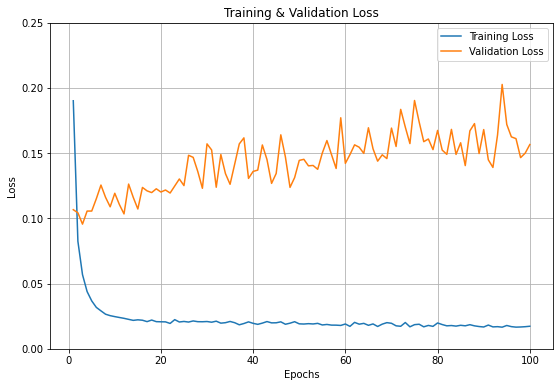

In [40]:
epochs = range(1, len(Hist_mnis.history['loss']) +1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnis.history['loss'])
plt.plot(epochs, Hist_mnis.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [41]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1512 - accuracy: 0.9802
Loss = 0.15119
Accuracy = 0.98020


- Overfitting 줄이기 7
    - Dropout + Batch Normalization


In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256))                 
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [43]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [44]:
%%time

Hist_mnis = mnist.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.2832 - accuracy: 0.9140 - val_loss: 0.1318 - val_accuracy: 0.9594
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1434 - accuracy: 0.9560 - val_loss: 0.0938 - val_accuracy: 0.9729
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1113 - accuracy: 0.9657 - val_loss: 0.0896 - val_accuracy: 0.9736
Epoch 4/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0932 - accuracy: 0.9708 - val_loss: 0.0954 - val_accuracy: 0.9748
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0808 - accuracy: 0.9749 - val_loss: 0.0795 - val_accuracy: 0.9773
Epoch 6/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0758 - accuracy: 0.9761 - val_loss: 0.0780 - val_accuracy: 0.9789
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0668 - accuracy: 0.9788 - val_loss: 0.0793 - val_accuracy: 0.9804

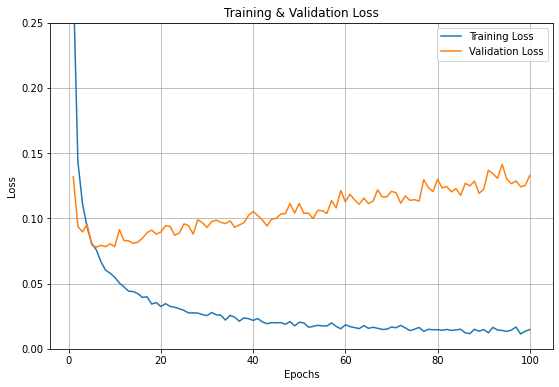

In [45]:
epochs = range(1, len(Hist_mnis.history['loss']) +1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnis.history['loss'])
plt.plot(epochs, Hist_mnis.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [46]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1039 - accuracy: 0.9857
Loss = 0.10392
Accuracy = 0.98570


- overfitting 줄이기 8
    - model capactiy + Batch Normalization

In [47]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation='relu' ,input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(128, activation='relu'))                 
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(10, activation = 'softmax'))

In [48]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [49]:
%%time

Hist_mnis = mnist.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.2056 - accuracy: 0.9391 - val_loss: 0.1444 - val_accuracy: 0.9603
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0825 - accuracy: 0.9753 - val_loss: 0.1033 - val_accuracy: 0.9682
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0896 - val_accuracy: 0.9747
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0935 - val_accuracy: 0.9749
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0899 - val_accuracy: 0.9760
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0958 - val_accuracy: 0.9748

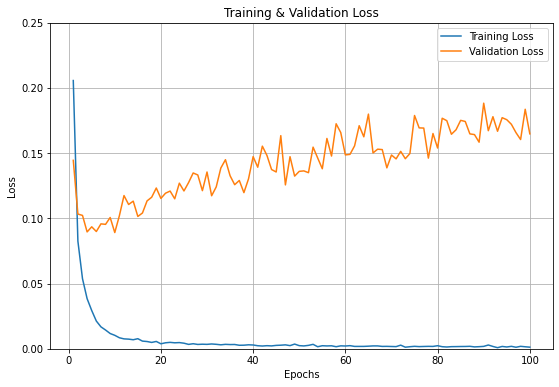

In [50]:
epochs = range(1, len(Hist_mnis.history['loss']) +1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnis.history['loss'])
plt.plot(epochs, Hist_mnis.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [51]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1455 - accuracy: 0.9821
Loss = 0.14554
Accuracy = 0.98210
